In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
import sympy as sym
from sympy.solvers.solvers import unrad
from sympy import nroots
from scipy import linalg
import scipy as sci
from scipy import optimize
from scipy import stats
from scipy.interpolate import lagrange
from scipy.optimize import root
from scipy.optimize import minimize
from scipy.optimize import fixed_point
from scipy import odr
from matplotlib import colors as c
import mpmath as mp
import time
import pandas



In [2]:
%matplotlib nbagg
import matplotlib
matplotlib.use('nbagg')
cMap = c.ListedColormap(['g','b','r'])

In [3]:
found_4th = [False, 0, 0] #is it found, x_val,y_val

In [4]:
def hMap(a,b,x,y):
    return 1 - a*x**2 + b*y
    


def backwards_hMap(a,b,x,y):
    return -(1/b)*(1 - a*y**2 - x)
    

def getPeriodic(a,b):
    p1 = (-1*(1 - b) + sym.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - sym.sqrt((1-b)**2 + 4*a))/(2*a)
    return p1,p2

def getUnstableLin(a,b,x):
    evecUn = [-a*x + sym.sqrt(b+a**2 * x**2),1]

    return evecUn

def getStableLin(a,b,x):
    evecSt = [-a*x - sym.sqrt(b+a**2 * x**2),1]
    return evecSt

def getValsMat(M, t0, s0):
    return M.subs([(t,t0),(s,s0)])
def hMap_n(a,b,x,y,n):
    x_i = x
    y_i = y
    
    for i in range(n):
        old_x = x_i
        old_y = y_i
        
        new_x = hMap(a,b,old_x,old_y)
        new_y = old_x
        
        x_i = new_x
        y_i = new_y
        
        if not(np.isfinite(x_i)):
            break
        if np.abs(x_i) > 200 or np.abs(y_i) > 200 :
            
            break
        
    x_n, y_n = x_i,y_i
    return [x_n, y_n]
def NhMap_n(a,b,x,y,n,N):
    x_i,y_i = x,y
    for i in range(N):
        x_i,y_i = hMap_n(a,b,x_i,y_i,n)
    return [x_i,y_i]

def in_set(elem,my_set,error):
    
    for x in my_set:
        if np.abs(elem - x) < error:
            return True
    return False

In [8]:
###################
#TRY THE OTHER 3 COEXISTENCE
#walk on period 6 inside 7-tube
b_vals_267 = [-0.21245789473683951, -0.21244736842105005, -0.21243684210526056, -0.2124263157894711, -0.21241578947368162, -0.21240526315789215]
a_vals_267 = [1.512683038946791, 1.5127073201690993, 1.5127316013914074, 1.5127558826137157, 1.512780163836024, 1.5128044450583324]

In [9]:
b_val,a_val = 1.51271, -0.212448

In [37]:
b_val,a_val = b_vals_267[-1], a_vals_267[-1]
density = 5000
x_vals,y_vals = np.linspace(1.16,1.24, density),np.linspace(0,0,density)
x_f,y_f = np.zeros(density),np.zeros(density)
basin1_x,basin2_x,basin3_x,basin4_x = [],[],[],[]
basin1_y,basin2_y,basin3_y,basin4_y = [],[],[],[]







counter = 0
my_err = 0.01
a_i,b = a_val,b_val
for i in range(density):
    if i % 2000 == 0:
        print(i / density * 100)
    
    xy = hMap_n(a_i,b,x_vals[i],y_vals[i],1500)
    if not (np.isnan(xy[0]) or (np.abs(xy[0])>200) or (np.abs(xy[1]) > 200)):
        #if first instance of converged result (counter == 0) then generate first basin set
        if counter == 0:
            print(0)
            counter +=1;
            n = 1;
            #iterate it until it returns to itself
            basin1_x.append(xy[0])
            basin1_y.append(xy[1])
            returned = False
            while(not returned):
                xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                if (not in_set(xy_new[0],basin1_x,my_err)) and (not in_set(xy_new[1],basin1_y,my_err)):
                    xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                    basin1_x.append(xy_new[0])
                    basin1_y.append(xy_new[1])
                    xy = xy_new
                else: returned = True
            x_f[i], y_f[i] = 1,1
            continue
        
        if counter == 1: 
            #print(1)
            #check if still in basin1
            if (in_set(xy[0],basin1_x,my_err)) and (in_set(xy[1],basin1_y,my_err)):
                x_f[i],y_f[i] = 1,1
                
            #otherwise we need to create basin2
            else:
                counter += 1
                
                #iterate until it returns to itself
                basin2_x.append(xy[0])
                basin2_y.append(xy[1])
                
                returned = False
                while(not returned):
                    xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                    if (not in_set(xy_new[0],basin2_x,my_err)) and (not in_set(xy_new[1],basin2_y,my_err)):
                        xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                        basin2_x.append(xy_new[0])
                        basin2_y.append(xy_new[1])
                        xy = xy_new
                    else: returned = True
                x_f[i],y_f[i] = 2,2
                continue
        elif counter == 2:
            #print(2)
            #check to see if in basin 1
            if (in_set(xy[0],basin1_x,my_err)) and (in_set(xy[1],basin1_y,my_err)):
                x_f[i],y_f[i] = 1,1
                
            #check if in basin 2    
            elif (in_set(xy[0],basin2_x,my_err)) and (in_set(xy[1],basin2_y,my_err)):
                x_f[i],y_f[i] = 2,2
         
            else:
                counter += 1
                #iterate until it returns to itself
                basin3_x.append(xy[0])
                basin3_y.append(xy[1])                
                returned = False
                while(not returned):
                    xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                    if (not in_set(xy_new[0],basin3_x,my_err)) and (not in_set(xy_new[1],basin3_y,my_err)):
                        xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                        basin3_x.append(xy_new[0])
                        basin3_y.append(xy_new[1])
                        xy = xy_new
                    else: 
                        returned = True
                x_f[i],y_f[i] = 3,3
                continue
        elif counter == 3:
            #print(3)
            #check to see if in basin 1
            if (in_set(xy[0],basin1_x,my_err)) and (in_set(xy[1],basin1_y,my_err)):
                x_f[i],y_f[i] = 1,1
                
            #check if in basin 2    
            elif (in_set(xy[0],basin2_x,my_err)) and (in_set(xy[1],basin2_y,my_err)):
                x_f[i],y_f[i] = 2,2
            
            #check to see if in basin 3
            elif (in_set(xy[0],basin3_x,my_err)) and (in_set(xy[1],basin3_y,my_err)):
                x_f[i],y_f[i] = 3,3
            else: 
                counter = 4;
                #iterate until it returns to itself
                basin4_x.append(xy[0])
                basin4_y.append(xy[1])                
                returned = False
                while(not returned):
                    xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                    if (not in_set(xy_new[0],basin4_x,my_err)) and (not in_set(xy_new[1],basin4_y,my_err)):
                        xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
                        basin4_x.append(xy_new[0])
                        basin4_y.append(xy_new[1])
                        xy = xy_new
                    else: returned = True
                x_f[i],y_f[i] = 4,4
                continue      
                
        elif counter == 4:
            #print(4)
            #check to see if in basin 1
            if (in_set(xy[0],basin1_x,my_err)) and (in_set(xy[1],basin1_y,my_err)):
                x_f[i],y_f[i] = 1,1
                
            #check if in basin 2    
            elif (in_set(xy[0],basin2_x,my_err)) and (in_set(xy[1],basin2_y,my_err)):
                x_f[i],y_f[i] = 2,2
            
            #check to see if in basin 3
            elif (in_set(xy[0],basin3_x,my_err)) and (in_set(xy[1],basin3_y,my_err)):
                x_f[i],y_f[i] = 3,3
            
            #see if in basin 4
            elif (in_set(xy[0],basin4_x,my_err)) and (in_set(xy[1],basin4_y,my_err)):
                x_f[i],y_f[i] = 4,4
        else:
            print("Something weird went wrong")
            print(xy)
            print(basin1_x,basin2_x,basin3_x,basin4_x, counter)
    
        
    else:
        x_f[i],y_f[i]=np.NaN,np.NaN
         
        
            
                        
print(basin1_x,basin1_y)
print(basin2_x,basin2_y)
print(basin3_x,basin3_y)
print(basin4_x,basin4_y)

0.0
0
6.666666666666667
13.333333333333334
20.0
26.666666666666668
33.33333333333333
40.0
46.666666666666664
53.333333333333336
60.0
66.66666666666666
73.33333333333333
80.0
86.66666666666667
93.33333333333333
[0.8241618815626878, -0.022732941346199503] [-0.02273294134619922, 0.8241618815626878]
[1.0485764963338824, -0.7227644173569857, -0.012994664746343365, 1.153263512126676, -1.0092950835445345, -0.7860176764017108, 0.27973301565606745] [0.2797330156560701, 1.0485764963338824, -0.7227644173569857, -0.012994664746343365, 1.153263512126676, -1.0092950835445345, -0.7860176764017108]
[1.1939324121143287, -1.1550087938763034, -1.2717472090128337, -1.2013906521443376, -0.9133646093052415, -0.006852581737661845] [-0.006852581737657293, 1.1939324121143287, -1.1550087938763034, -1.2717472090128337, -1.2013906521443376, -0.9133646093052415]
[] []


<IPython.core.display.Javascript object>


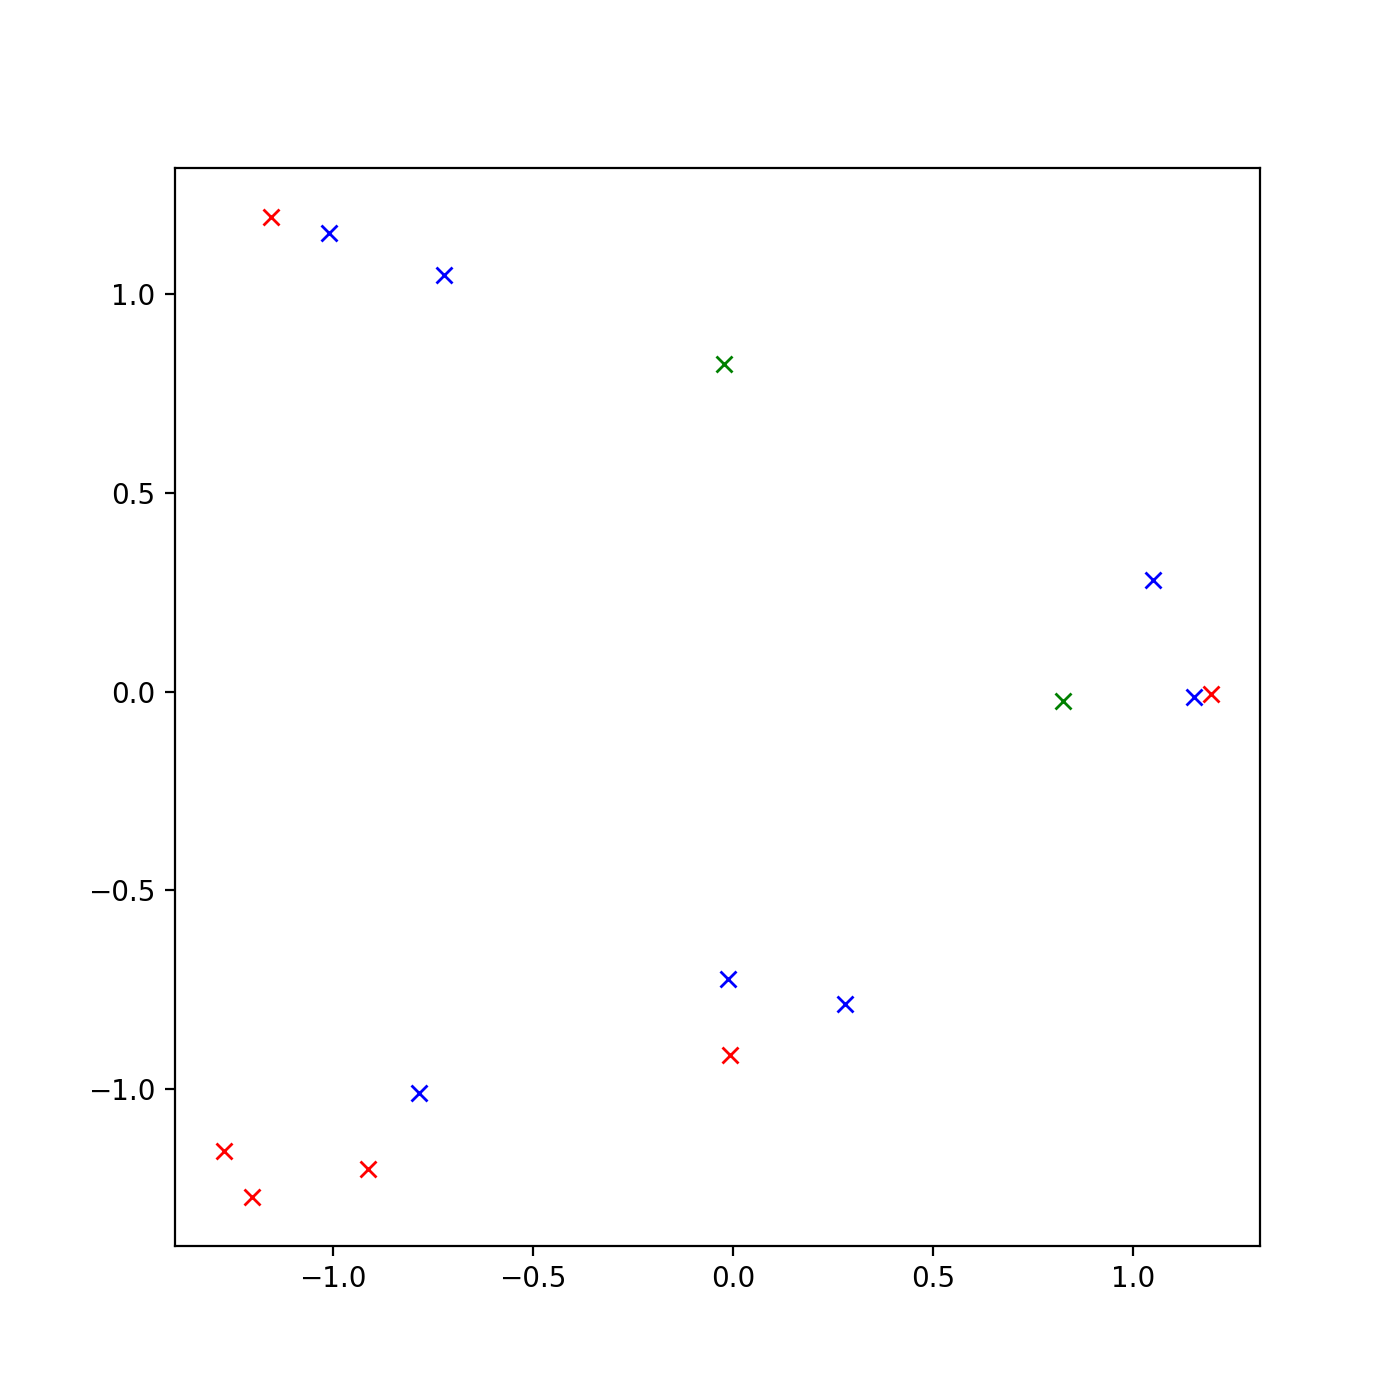

In [38]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.plot(basin1_x,basin1_y,'x',color='green')
ax.plot(basin2_x,basin2_y,'x',color='blue')
ax.plot(basin3_x,basin3_y,'x',color='red')
ax.plot(basin4_x,basin4_y,'x',color='black')

<IPython.core.display.Javascript object>


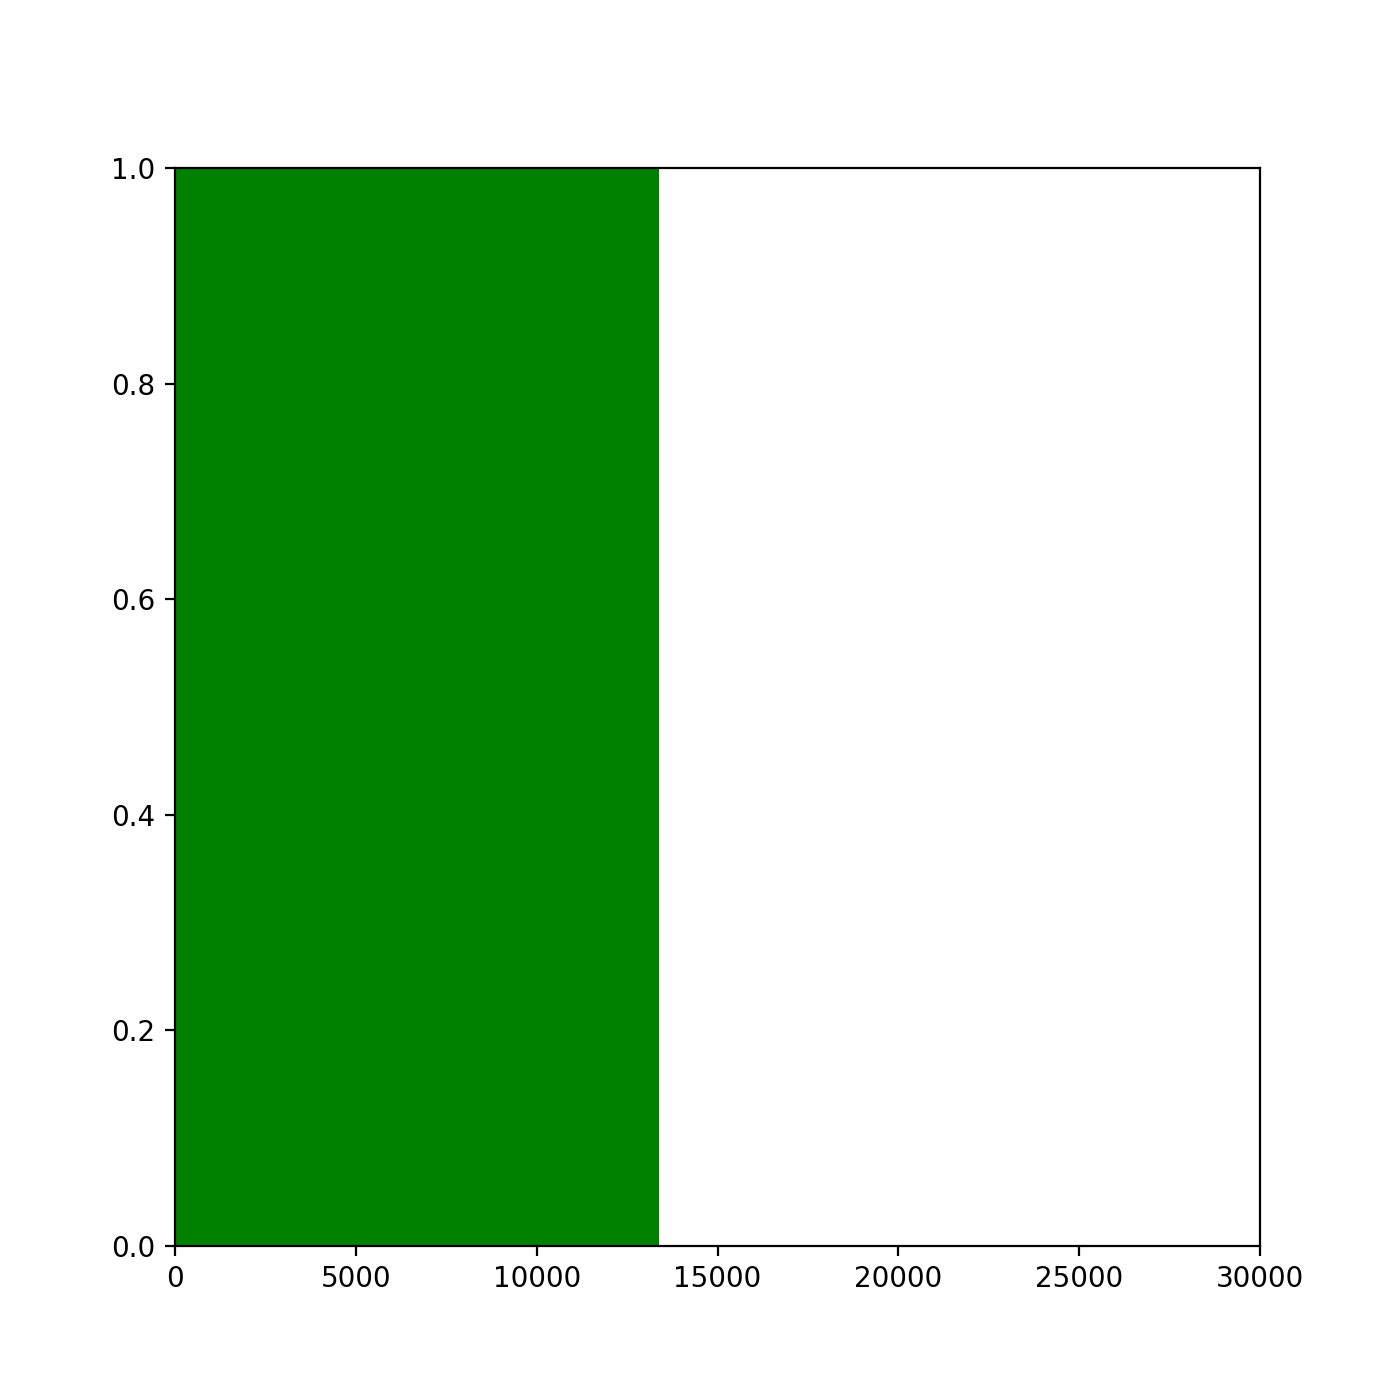

In [39]:
cMap = c.ListedColormap(['g','b','r'])

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.pcolormesh([x_f],cmap = cMap)
plt.show()

In [10]:
def get_basins_ofLine(a_i,b_i,xy_0,xy_1,density):
    
    b_val,a_val = b_i,a_i

    
    x_vals,y_vals = np.linspace(xy_0[0],xy_1[0], density),np.linspace(xy_0[1],xy_1[1],density)
    x_f,y_f = np.zeros(density),np.zeros(density)
    basin1_x,basin2_x,basin3_x,basin4_x = [],[],[],[]
    basin1_y,basin2_y,basin3_y,basin4_y = [],[],[],[]



    counter = 0
    my_err = 0.0001
    a_i,b = a_val,b_val
    for i in range(density):
        period_count = 1
        if i % 100 == 0:
            print(i / density * 100)

        xy = hMap_n(a_i,b,x_vals[i],y_vals[i],1500) #image of point after 1500 iterations
        
        #check if diverged, if so then set to white (NaN) and skip
        if (np.isnan(xy[0]) or (np.abs(xy[0])>200) or (np.abs(xy[1]) > 200)):
            x_f[i],y_f[i] = np.NaN,np.NaN
            #print('skipped')
            continue
        
        #print(xy) 
            
        returned = False
        xy_new = hMap_n(a_i,b,xy[0],xy[1],1)
        while(not returned):
            
            if  np.abs(xy_new[0] - xy[0]) > my_err and np.abs(xy_new[1] - xy[1]) > my_err: 
                period_count+=1
                xy_new = hMap_n(a_i,b,xy_new[0],xy_new[1],1)
                #print(xy_new)
                    
            else: returned = True
        
        #now we know period of orbit
        x_f[i],y_f[i] = period_count,period_count
        if not in_set(period_count, [2,6,7], 0.1):
            print(period_count)
            print('!!!!!!!!')
            print("Found another period")
            print('------------------------------------------------------------------')

    return x_f




In [12]:
par_dens = 100
b_train = np.linspace(b_vals_267[0],b_vals_267[-1],par_dens)
a_train = np.linspace( a_vals_267[0], a_vals_267[-1],par_dens)

x_f_list = []
start = time.time()
for i in range(par_dens):
    
    x_f_list.append(get_basins_ofLine( a_train[i],b_train[i],[1.16,0],[1.24,0],1000))
    print(i,': ',(time.time()-start)/60,' min')

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0 :  0.04019466638565063  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
1 :  0.0797449509302775  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
2 :  0.119852081934611  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
3 :  0.1608292539914449  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
4 :  0.20103352069854735  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
5 :  0.2410274863243103  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
6 :  0.2803414980570475  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
7 :  0.32004228432973225  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
8 :  0.35922447045644124  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
9 :  0.398330553372701  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
10 :  0.4379599173863729  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
11 :  0.4774117350578308  min
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
12 :  0.516

<IPython.core.display.Javascript object>


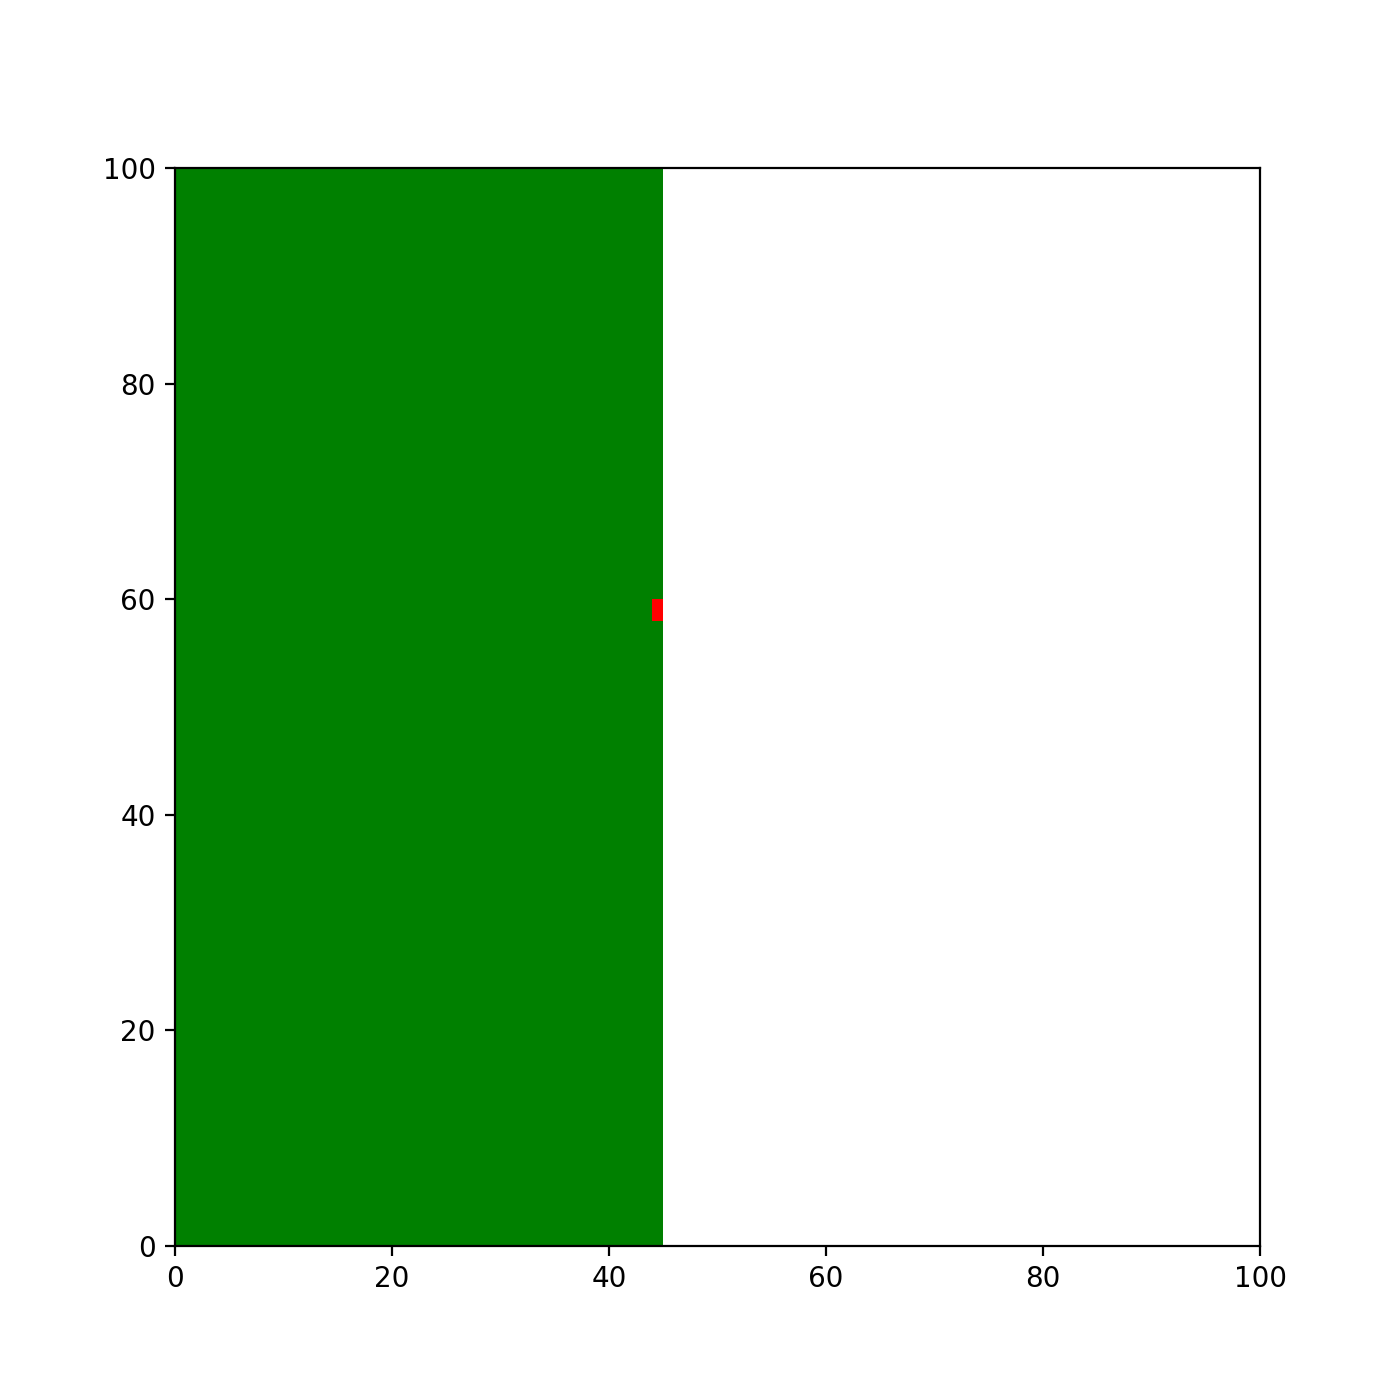

In [42]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)

ax.pcolormesh(np.row_stack((x_f_list[:])),cmap = cMap)
plt.show()

In [43]:
print(np.linspace(1.16,1.24,3000)[1310])
print(np.linspace(1.16,1.24,3000)[1341])

1.1949449816605535
1.1957719239746583


In [ ]:
par_dens = 500
b_train = np.linspace(b_vals_267[0],b_vals_267[-1],par_dens)
a_train = np.linspace( a_vals_267[0], a_vals_267[-1],par_dens)

x_f_list = []
start = time.time()
for i in range(par_dens):
    
    x_f_list.append(get_basins_ofLine( a_train[i],b_train[i],[1.1949449816605535,0],[1.1957719239746583,0],1000))
    print(i,': ',(time.time()-start)/60,' min')

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)

ax.pcolormesh(np.row_stack((x_f_list[:])),cmap = cMap)
plt.title('Inside Per 6/7/2 Tube')
plt.show()

In [16]:
par_dens = 1500
b_train = np.linspace(b_vals_267[0],b_vals_267[-1],par_dens)
a_train = np.linspace( a_vals_267[0], a_vals_267[-1],par_dens)

x_f_list = []
start = time.time()

x_bot_left = 1.1956839631216407
x_bot_right = 1.1956977500891983
x_top_left = 1.1956205430708757
x_top_right = 1.1956370874319449

x_left = np.linspace(x_bot_left,x_top_left,par_dens)
x_right = np.linspace(x_bot_right,x_top_right,par_dens)
for i in range(par_dens):
    
    x_f_list.append(get_basins_ofLine( a_train[i],b_train[i],[x_left[i],0],[x_right[i],0],par_dens))
    print(i,': ',(time.time()-start)/60,' min')

0.0
0
33.33333333333333
66.66666666666666
0 :  0.12981090148289998  min
0.0
0
33.33333333333333
66.66666666666666
1 :  0.26030641396840415  min
0.0
0
33.33333333333333
66.66666666666666
2 :  0.3902810136477152  min
0.0
0
33.33333333333333
66.66666666666666
3 :  0.5185763835906982  min
0.0
0
33.33333333333333
66.66666666666666
4 :  0.646850848197937  min
0.0
0
33.33333333333333
66.66666666666666
5 :  0.7752563993136088  min
0.0
0
33.33333333333333
66.66666666666666
6 :  0.9035001516342163  min
0.0
0
33.33333333333333
66.66666666666666
7 :  1.0318278312683105  min
0.0
0
33.33333333333333
66.66666666666666
8 :  1.1623406171798707  min
0.0
0
33.33333333333333
66.66666666666666
9 :  1.2960489511489868  min
0.0
0
33.33333333333333
66.66666666666666
10 :  1.426712449391683  min
0.0
0
33.33333333333333
66.66666666666666
11 :  1.5575662493705749  min
0.0
0
33.33333333333333
66.66666666666666
12 :  1.6878140330314637  min
0.0
0
33.33333333333333
66.66666666666666
13 :  1.8199906667073569  min
0.

114 :  14.789144066969554  min
0.0
0
33.33333333333333
66.66666666666666
115 :  14.917385733127594  min
0.0
0
33.33333333333333
66.66666666666666
116 :  15.0458482503891  min
0.0
0
33.33333333333333
66.66666666666666
117 :  15.173966399828593  min
0.0
0
33.33333333333333
66.66666666666666
118 :  15.302464767297108  min
0.0
0
33.33333333333333
66.66666666666666
119 :  15.430917366345723  min
0.0
0
33.33333333333333
66.66666666666666
120 :  15.55895524819692  min
0.0
0
33.33333333333333
66.66666666666666
121 :  15.687269516785939  min
0.0
0
33.33333333333333
66.66666666666666
122 :  15.815518983205159  min
0.0
0
33.33333333333333
66.66666666666666
123 :  15.943658498922984  min
0.0
0
33.33333333333333
66.66666666666666
124 :  16.0722954471906  min
0.0
0
33.33333333333333
66.66666666666666
125 :  16.200660169124603  min
0.0
0
33.33333333333333
66.66666666666666
126 :  16.329228814442953  min
0.0
0
33.33333333333333
66.66666666666666
127 :  16.457637866338093  min
0.0
0
33.33333333333333
6

227 :  29.296499848365784  min
0.0
0
33.33333333333333
66.66666666666666
228 :  29.426820850372316  min
0.0
0
33.33333333333333
66.66666666666666
229 :  29.557460685571034  min
0.0
0
33.33333333333333
66.66666666666666
230 :  29.686894798278807  min
0.0
0
33.33333333333333
66.66666666666666
231 :  29.815037246545156  min
0.0
0
33.33333333333333
66.66666666666666
232 :  29.944530018170674  min
0.0
0
33.33333333333333
66.66666666666666
233 :  30.074221614996592  min
0.0
0
33.33333333333333
66.66666666666666
234 :  30.2022030154864  min
0.0
0
33.33333333333333
66.66666666666666
235 :  30.33200784921646  min
0.0
0
33.33333333333333
66.66666666666666
236 :  30.461522734165193  min
0.0
0
33.33333333333333
66.66666666666666
237 :  30.592203931013742  min
0.0
0
33.33333333333333
66.66666666666666
238 :  30.722154132525127  min
0.0
0
33.33333333333333
66.66666666666666
239 :  30.852082367738088  min
0.0
0
33.33333333333333
66.66666666666666
240 :  30.980498464902244  min
0.0
0
33.33333333333333

33.33333333333333
66.66666666666666
341 :  43.95455904801687  min
0.0
0
33.33333333333333
66.66666666666666
342 :  44.08278988202413  min
0.0
0
33.33333333333333
66.66666666666666
343 :  44.21099563439687  min
0.0
0
33.33333333333333
66.66666666666666
344 :  44.33961899677912  min
0.0
0
33.33333333333333
66.66666666666666
345 :  44.467882283528645  min
0.0
0
33.33333333333333
66.66666666666666
346 :  44.59593066374461  min
0.0
0
33.33333333333333
66.66666666666666
347 :  44.72395738363266  min
0.0
0
33.33333333333333
66.66666666666666
348 :  44.85227510134379  min
0.0
0
33.33333333333333
66.66666666666666
349 :  44.98030851682027  min
0.0
0
33.33333333333333
66.66666666666666
350 :  45.108442831039426  min
0.0
0
33.33333333333333
66.66666666666666
351 :  45.23676138321559  min
0.0
0
33.33333333333333
66.66666666666666
352 :  45.36574623187383  min
0.0
0
33.33333333333333
66.66666666666666
353 :  45.49445331494014  min
0.0
0
33.33333333333333
66.66666666666666
354 :  45.62284528017044  

454 :  61.84069820245107  min
0.0
0
33.33333333333333
66.66666666666666
455 :  62.01172685225804  min
0.0
0
33.33333333333333
66.66666666666666
456 :  62.18268133401871  min
0.0
0
33.33333333333333
66.66666666666666
457 :  62.351770150661466  min
0.0
0
33.33333333333333
66.66666666666666
458 :  62.521178499857584  min
0.0
0
33.33333333333333
66.66666666666666
459 :  62.69415436585744  min
0.0
0
33.33333333333333
66.66666666666666
460 :  62.86425342957179  min
0.0
0
33.33333333333333
66.66666666666666
461 :  63.034162231286366  min
0.0
0
33.33333333333333
66.66666666666666
462 :  63.203631579875946  min
0.0
0
33.33333333333333
66.66666666666666
463 :  63.37678968111674  min
0.0
0
33.33333333333333
66.66666666666666
464 :  63.54586149851481  min
0.0
0
33.33333333333333
66.66666666666666
465 :  63.7159039179484  min
0.0
0
33.33333333333333
66.66666666666666
466 :  63.88555674950282  min
0.0
0
33.33333333333333
66.66666666666666
467 :  64.0556998650233  min
0.0
0
33.33333333333333
66.66666

568 :  81.15151379903158  min
0.0
0
33.33333333333333
66.66666666666666
569 :  81.32040541569391  min
0.0
0
33.33333333333333
66.66666666666666
570 :  81.4890964627266  min
0.0
0
33.33333333333333
66.66666666666666
571 :  81.65768361886343  min
0.0
0
33.33333333333333
66.66666666666666
572 :  81.82672256628672  min
0.0
0
33.33333333333333
66.66666666666666
573 :  81.99563719828923  min
0.0
0
33.33333333333333
66.66666666666666
574 :  82.16460701624553  min
0.0
0
33.33333333333333
66.66666666666666
575 :  82.33356479803722  min
0.0
0
33.33333333333333
66.66666666666666
576 :  82.50269000132879  min
0.0
0
33.33333333333333
66.66666666666666
577 :  82.67160470088324  min
0.0
0
33.33333333333333
66.66666666666666
578 :  82.84057885011038  min
0.0
0
33.33333333333333
66.66666666666666
579 :  83.00916554927826  min
0.0
0
33.33333333333333
66.66666666666666
580 :  83.1782883644104  min
0.0
0
33.33333333333333
66.66666666666666
581 :  83.34683450063069  min
0.0
0
33.33333333333333
66.666666666

33.33333333333333
66.66666666666666
683 :  100.62032637993495  min
0.0
0
33.33333333333333
66.66666666666666
684 :  100.78963216543198  min
0.0
0
33.33333333333333
66.66666666666666
685 :  100.9582552631696  min
0.0
0
33.33333333333333
66.66666666666666
686 :  101.12903764645259  min
0.0
0
33.33333333333333
66.66666666666666
687 :  101.29787643353144  min
0.0
0
33.33333333333333
66.66666666666666
688 :  101.46720541715622  min
0.0
0
33.33333333333333
66.66666666666666
689 :  101.63646076520284  min
0.0
0
33.33333333333333
66.66666666666666
690 :  101.80503246386846  min
0.0
0
33.33333333333333
66.66666666666666
691 :  101.9739169160525  min
0.0
0
33.33333333333333
66.66666666666666
692 :  102.14278469880422  min
0.0
0
33.33333333333333
66.66666666666666
693 :  102.31133278210957  min
0.0
0
33.33333333333333
66.66666666666666
694 :  102.48034056425095  min
0.0
0
33.33333333333333
66.66666666666666
695 :  102.64915988445281  min
0.0
0
33.33333333333333
66.66666666666666
696 :  102.817897

795 :  119.53261144955952  min
0.0
0
33.33333333333333
66.66666666666666
796 :  119.70131475130717  min
0.0
0
33.33333333333333
66.66666666666666
797 :  119.86998556454976  min
0.0
0
33.33333333333333
66.66666666666666
798 :  120.03887205123901  min
0.0
0
33.33333333333333
66.66666666666666
799 :  120.20749768416087  min
0.0
0
33.33333333333333
66.66666666666666
800 :  120.3761680483818  min
0.0
0
33.33333333333333
66.66666666666666
801 :  120.54492251475652  min
0.0
0
33.33333333333333
66.66666666666666
802 :  120.71380126476288  min
0.0
0
33.33333333333333
66.66666666666666
803 :  120.8823071638743  min
0.0
0
33.33333333333333
66.66666666666666
804 :  121.05126593112945  min
0.0
0
33.33333333333333
66.66666666666666
805 :  121.21999226808548  min
0.0
0
33.33333333333333
66.66666666666666
806 :  121.38872366348902  min
0.0
0
33.33333333333333
66.66666666666666
807 :  121.55736314853033  min
0.0
0
33.33333333333333
66.66666666666666
808 :  121.72626446485519  min
0.0
0
33.3333333333333

66.66666666666666
908 :  138.65874736706417  min
0.0
0
33.33333333333333
66.66666666666666
909 :  138.82792738278707  min
0.0
0
33.33333333333333
66.66666666666666
910 :  138.9975350658099  min
0.0
0
33.33333333333333
66.66666666666666
911 :  139.16730969746908  min
0.0
0
33.33333333333333
66.66666666666666
912 :  139.3367042819659  min
0.0
0
33.33333333333333
66.66666666666666
913 :  139.50621763467788  min
0.0
0
33.33333333333333
66.66666666666666
914 :  139.67573056618372  min
0.0
0
33.33333333333333
66.66666666666666
915 :  139.84525474707286  min
0.0
0
33.33333333333333
66.66666666666666
916 :  140.01408360004424  min
0.0
0
33.33333333333333
66.66666666666666
917 :  140.18355031410854  min
0.0
0
33.33333333333333
66.66666666666666
918 :  140.35473343133927  min
0.0
0
33.33333333333333
66.66666666666666
919 :  140.52782033284504  min
0.0
0
33.33333333333333
66.66666666666666
920 :  140.70032519896824  min
0.0
0
33.33333333333333
66.66666666666666
921 :  140.8745849688848  min
0.0
0

33.33333333333333
66.66666666666666
1021 :  157.83022603591283  min
0.0
0
33.33333333333333
66.66666666666666
1022 :  157.99924676418306  min
0.0
0
33.33333333333333
66.66666666666666
1023 :  158.16827846765517  min
0.0
0
33.33333333333333
66.66666666666666
1024 :  158.33776963154475  min
0.0
0
33.33333333333333
66.66666666666666
1025 :  158.5073858499527  min
0.0
0
33.33333333333333
66.66666666666666
1026 :  158.67690146366755  min
0.0
0
33.33333333333333
66.66666666666666
1027 :  158.8460383494695  min
0.0
0
33.33333333333333
66.66666666666666
1028 :  159.01515161593755  min
0.0
0
33.33333333333333
66.66666666666666
1029 :  159.18440479834874  min
0.0
0
33.33333333333333
66.66666666666666
1030 :  159.35362720092138  min
0.0
0
33.33333333333333
66.66666666666666
1031 :  159.52292463382085  min
0.0
0
33.33333333333333
66.66666666666666
1032 :  159.69240504900614  min
0.0
0
33.33333333333333
66.66666666666666
1033 :  159.86168984969456  min
0.0
0
33.33333333333333
66.66666666666666
1034

66.66666666666666
1132 :  176.261981232961  min
0.0
0
33.33333333333333
66.66666666666666
1133 :  176.39102581739425  min
0.0
0
33.33333333333333
66.66666666666666
1134 :  176.5201489488284  min
0.0
0
33.33333333333333
66.66666666666666
1135 :  176.64943228165308  min
0.0
0
33.33333333333333
66.66666666666666
1136 :  176.7785177787145  min
0.0
0
33.33333333333333
66.66666666666666
1137 :  176.90749682982764  min
0.0
0
33.33333333333333
66.66666666666666
1138 :  177.03676911592484  min
0.0
0
33.33333333333333
66.66666666666666
1139 :  177.1658184806506  min
0.0
0
33.33333333333333
66.66666666666666
1140 :  177.2951274474462  min
0.0
0
33.33333333333333
66.66666666666666
1141 :  177.424069917202  min
0.0
0
33.33333333333333
66.66666666666666
1142 :  177.55321798324584  min
0.0
0
33.33333333333333
66.66666666666666
1143 :  177.68231663306554  min
0.0
0
33.33333333333333
66.66666666666666
1144 :  177.8115252494812  min
0.0
0
33.33333333333333
66.66666666666666
1145 :  177.94055949846904  m

33.33333333333333
66.66666666666666
1244 :  190.71936690012615  min
0.0
0
33.33333333333333
66.66666666666666
1245 :  190.8483762661616  min
0.0
0
33.33333333333333
66.66666666666666
1246 :  190.977385866642  min
0.0
0
33.33333333333333
66.66666666666666
1247 :  191.10636578400928  min
0.0
0
33.33333333333333
66.66666666666666
1248 :  191.23527421951295  min
0.0
0
33.33333333333333
66.66666666666666
1249 :  191.36443978150686  min
0.0
0
33.33333333333333
66.66666666666666
1250 :  191.49319613377253  min
0.0
0
33.33333333333333
66.66666666666666
1251 :  191.62221614917118  min
0.0
0
33.33333333333333
66.66666666666666
1252 :  191.75123369693756  min
0.0
0
33.33333333333333
66.66666666666666
1253 :  191.88015644947689  min
0.0
0
33.33333333333333
66.66666666666666
1254 :  192.00909397999445  min
0.0
0
33.33333333333333
66.66666666666666
1255 :  192.13808388312657  min
0.0
0
33.33333333333333
66.66666666666666
1256 :  192.26724211374918  min
0.0
0
33.33333333333333
66.66666666666666
1257 

66.66666666666666
1355 :  205.04806399742762  min
0.0
0
33.33333333333333
66.66666666666666
1356 :  205.17711758216223  min
0.0
0
33.33333333333333
66.66666666666666
1357 :  205.30655595064164  min
0.0
0
33.33333333333333
66.66666666666666
1358 :  205.43587793509167  min
0.0
0
33.33333333333333
66.66666666666666
1359 :  205.5648821989695  min
0.0
0
33.33333333333333
66.66666666666666
1360 :  205.69419124921163  min
0.0
0
33.33333333333333
66.66666666666666
1361 :  205.8237278819084  min
0.0
0
33.33333333333333
66.66666666666666
1362 :  205.95307455062866  min
0.0
0
33.33333333333333
66.66666666666666
1363 :  206.08254588047663  min
0.0
0
33.33333333333333
66.66666666666666
1364 :  206.21155016422273  min
0.0
0
33.33333333333333
66.66666666666666
1365 :  206.34063011805216  min
0.0
0
33.33333333333333
66.66666666666666
1366 :  206.46958589951197  min
0.0
0
33.33333333333333
66.66666666666666
1367 :  206.59855398337046  min
0.0
0
33.33333333333333
66.66666666666666
1368 :  206.7274149656

33.33333333333333
66.66666666666666
1467 :  219.5076415657997  min
0.0
0
33.33333333333333
66.66666666666666
1468 :  219.63651056687038  min
0.0
0
33.33333333333333
66.66666666666666
1469 :  219.76563096443812  min
0.0
0
33.33333333333333
66.66666666666666
1470 :  219.89462896585465  min
0.0
0
33.33333333333333
66.66666666666666
1471 :  220.02355996370315  min
0.0
0
33.33333333333333
66.66666666666666
1472 :  220.15267930030822  min
0.0
0
33.33333333333333
66.66666666666666
1473 :  220.28196648359298  min
0.0
0
33.33333333333333
66.66666666666666
1474 :  220.41110210021336  min
0.0
0
33.33333333333333
66.66666666666666
1475 :  220.54007586638133  min
0.0
0
33.33333333333333
66.66666666666666
1476 :  220.66897716522217  min
0.0
0
33.33333333333333
66.66666666666666
1477 :  220.79779309829075  min
0.0
0
33.33333333333333
66.66666666666666
1478 :  220.92682544787723  min
0.0
0
33.33333333333333
66.66666666666666
1479 :  221.05570243199665  min
0.0
0
33.33333333333333
66.66666666666666
148

<IPython.core.display.Javascript object>


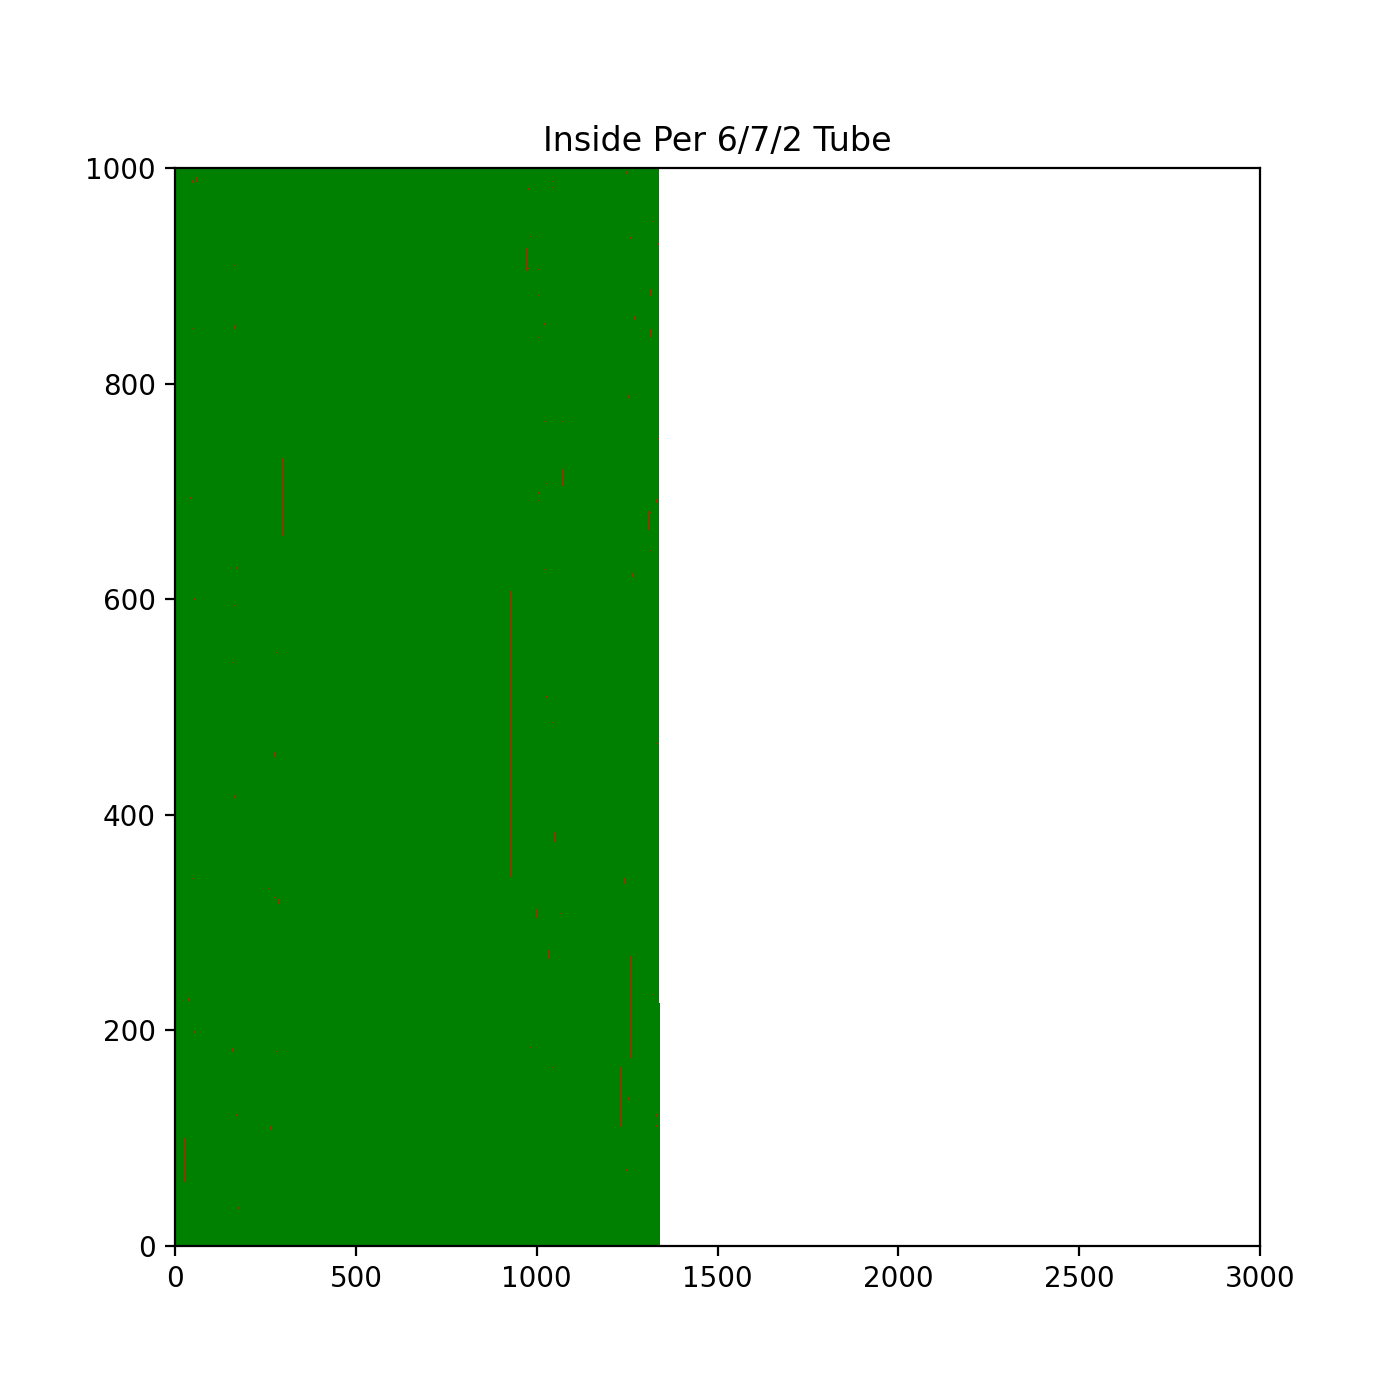

In [31]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)

ax.pcolormesh(np.row_stack((x_f_list[:])),cmap = cMap)
plt.title('Inside Per 6/7/2 Tube')
plt.show()

In [65]:
print(np.linspace(1.1949449816605535,1.1957719239746583,3000)[638])
print(np.linspace(1.1949449816605535,1.1957719239746583,3000)[668])

1.1951209033665884
1.195129175547123


In [35]:
par_dens = 150
b_train = np.linspace(b_vals_267[0],b_vals_267[-1],par_dens)
a_train = np.linspace( a_vals_267[0], a_vals_267[-1],par_dens)

x_f_list = []
start = time.time()

x_bot_left = 1.1956839631216407
x_bot_right = 1.1956977500891983
x_top_left = 1.1956205430708757
x_top_right = 1.1956370874319449

x_left = np.linspace(x_bot_left,x_top_left,par_dens)
x_right = np.linspace(x_bot_right,x_top_right,par_dens)
for i in range(par_dens):
    
    x_f_list.append(get_basins_ofLine( a_train[i],b_train[i],[x_left[i],0],[x_right[i],0],2000))
    print(i,': ',(time.time()-start)/60,' min')

0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
0 :  0.22962853113810222  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
1 :  0.4568840146064758  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
2 :  0.6835002819697062  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
3 :  0.9105224132537841  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
4 :  1.138693594932556  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
5 :  1.3668195327123007  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
6 :  1.5953821301460267  min
0.0
5.0
10.0
15.0
20

60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
58 :  13.516131699085236  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
59 :  13.745231362183889  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
60 :  13.975399347146352  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
61 :  14.206503482659658  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
62 :  14.437075662612916  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
63 :  14.667857782046001  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
64 :  14.898952960968018  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.

75.0
80.0
85.0
90.0
95.0
116 :  26.868540398279826  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
117 :  27.099202279249827  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
118 :  27.328904696305592  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
119 :  27.557141029834746  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
120 :  27.785774993896485  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
121 :  28.014398113886514  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
122 :  28.243012714385987  min
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
65.0
70.0
75.0
8

<IPython.core.display.Javascript object>


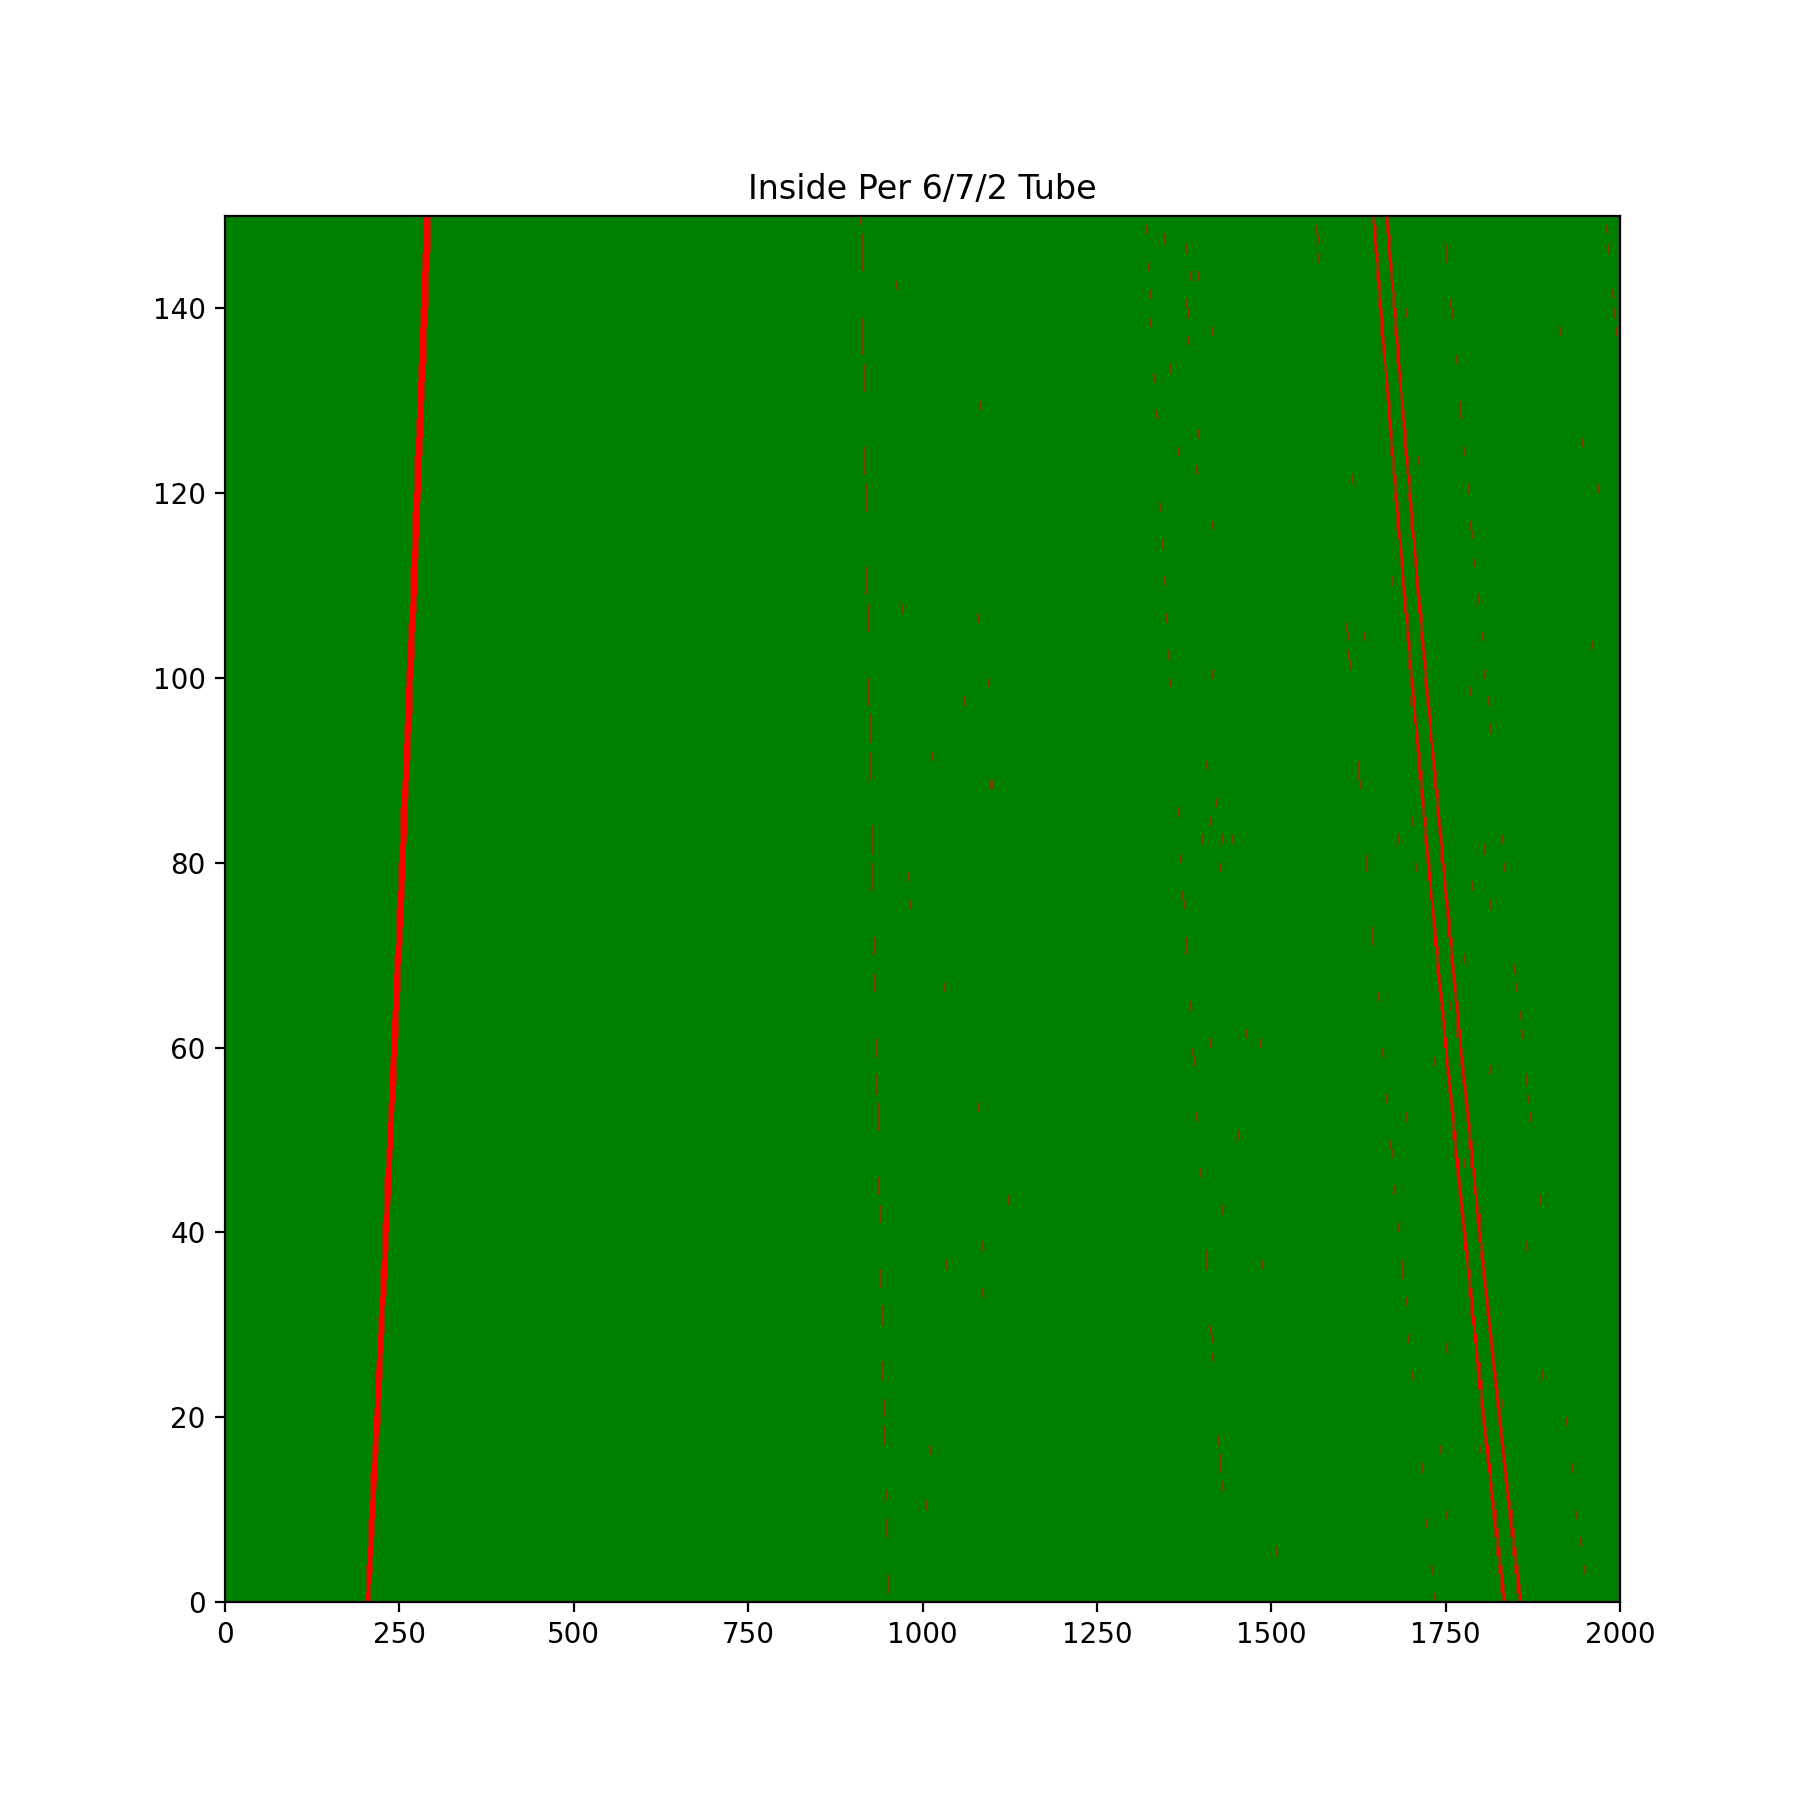

In [37]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1)

ax.pcolormesh(np.row_stack((x_f_list[:])),cmap = cMap)
plt.title('Inside Per 6/7/2 Tube')
plt.show()

In [20]:
par_dens = 1500
b_train = np.linspace(b_vals_267[0],b_vals_267[-1],par_dens)
a_train = np.linspace( a_vals_267[0], a_vals_267[-1],par_dens)

x_f_list = []
start = time.time()

x_bot_left = 1.195182117502544
x_bot_right = 1.1951903896830787
x_top_left = 1.1951209033665884
x_top_right = 1.195129175547123

x_left = np.linspace(x_bot_left,x_top_left,par_dens)
x_right = np.linspace(x_bot_right,x_top_right,par_dens)
for i in range(par_dens):
    
    x_f_list.append(get_basins_ofLine( a_train[i],b_train[i],[x_left[i],0],[x_right[i],0],1000))
    print(i,': ',(time.time()-start)/60,' min')


0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
0 :  0.2580385287602743  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
1 :  0.5160401821136474  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
2 :  0.7738773783047994  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
3 :  1.0316247622172037  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
4 :  1.2897053281466166  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
5 :  1.5480556964874268  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
6 :  1.8067606647809347  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
7 :  2.065163731575012  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
8 :  2.323554

50.0
66.66666666666666
83.33333333333334
72 :  18.815990793704987  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
73 :  19.074342147509256  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
74 :  19.33290663162867  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
75 :  19.590588863690694  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
76 :  19.84789869785309  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
77 :  20.105364616711935  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
78 :  20.36276561419169  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
79 :  20.620180531342825  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
80 :  20.877308464050294  min
0.0
0
16.66666666666

50.0
66.66666666666666
83.33333333333334
144 :  37.37477283080419  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
145 :  37.63233997821808  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
146 :  37.889403629302976  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
147 :  38.146706930796306  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
148 :  38.40404801368713  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
149 :  38.66129554510117  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
150 :  38.918582781155905  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
151 :  39.17613524595897  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
152 :  39.43339403072993  min
0.0
0
16.66666

33.33333333333333
50.0
66.66666666666666
83.33333333333334
216 :  55.9273021141688  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
217 :  56.18450264533361  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
218 :  56.44172996679942  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
219 :  56.69869728088379  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
220 :  56.95592509508133  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
221 :  57.21313427686691  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
222 :  57.47063886324565  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
223 :  57.72793201208115  min
0.0
0
16.666666666666664
33.33333333333333
50.0
66.66666666666666
83.33333333333334
224 :  57.98532681067785  min


KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1)

ax.pcolormesh(np.row_stack((x_f_list[:])),cmap = cMap)
plt.title('Inside Per 6/7/2 Tube')
plt.show()

In [39]:
print(1)

1
